# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [156]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [157]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
#clean_pyber_df = pyber_data_df.dropna()
#clean_pyber_df.head()
pyber_data_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [158]:
#  1. Get the total rides for each city type
#rides_city=clean_pyber_df.groupby("type")
rides_city=pyber_data_df.groupby("type")
rides_type=rides_city["ride_id"].count()
rides_type



type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [159]:
# 2. Get the total drivers for each city type

driver_city=city_data_df.groupby("type")
drivers=driver_city["driver_count"].sum()
drivers


type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [160]:
#  3. Get the total amount of fares for each city type
fares=rides_city["fare"].sum()
fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [161]:
#  4. Get the average fare per ride for each city type. 
avg_fare_ride= fares/rides_type
avg_fare_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [162]:
# 5. Get the average fare per driver for each city type. 
avg_fare_driver= fares/drivers
avg_fare_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [163]:
#  6. Create a PyBer summary DataFrame. 
summary_df = pd.DataFrame()
summary_df['Total Rides'] = rides_type
summary_df['Total Drivers'] = drivers
summary_df['Total Fares']= fares
summary_df['Avg Fare per Ride']=avg_fare_ride
summary_df['Avg Fare per Driver']= avg_fare_driver
summary_df

,Total Rides,Total Drivers,Total Fares,Avg Fare per Ride,Avg Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [164]:
#  7. Cleaning up the DataFrame. Delete the index name
summary_df.index.name = None
summary_df

,Total Rides,Total Drivers,Total Fares,Avg Fare per Ride,Avg Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [165]:
#  8. Format the columns.
#rides_type = rides_type['Total Rides'].map("{:,}".format)
#drivers=drivers['Total Drivers'].astype(int).map('{:,}'.format)
#fares = fares['Total Fares'].map("${:,.2f}".format)
#avg_fare_ride=avg_fare_ride['Avg Fare per Ride'].map("${:,.2f}".format)
#avg_fare_driver=avg_fare_driver['Avg Fare per Driver'].map("${:,.2f}".format)

#summary_df['Total Rides'] = summary_df['Total Rides'].map("{:,}".format)
#summary_df['Total Drivers'] =summary_df['Total Drivers'].astype(int).map('{:,}'.format)
#summary_df['Total Fares'] = summary_df['Total Fares'].map("${:,.2f}".format)
#summary_df['Avg Fare per Ride']=summary_df['Avg Fare per Ride'].map("${:,.2f}".format)
#summary_df['Avg Fare per Driver']=summary_df['Avg Fare per Driver'].map("${:,.2f}".format)


#rides_type['Total Rides'] = summary_df['Total Rides'].map("{:,}".format)
#drivers['Total Drivers'] =summary_df['Total Drivers'].astype(int).map('{:,}'.format)
#fares['Total Fares'] = summary_df['Total Fares'].map("${:,.2f}".format)
#avg_fare_ride['Avg Fare per Ride']=summary_df['Avg Fare per Ride'].map("${:,.2f}".format)
#avg_fare_driver['Avg Fare per Driver']=summary_df['Avg Fare per Driver'].map("${:,.2f}".format)

rides_type = summary_df['Total Rides'].map("{:,}".format)
drivers =summary_df['Total Drivers'].astype(int).map('{:,}'.format)
fares = summary_df['Total Fares'].map("${:,.2f}".format)
avg_fare_ride=summary_df['Avg Fare per Ride'].map("${:,.2f}".format)
avg_fare_driver=summary_df['Avg Fare per Driver'].map("${:,.2f}".format)

#summary_df = pd.DataFrame()
summary_df['Total Rides'] = rides_type
summary_df['Total Drivers'] = drivers
summary_df['Total Fares']= fares
summary_df['Avg Fare per Ride']=avg_fare_ride
summary_df['Avg Fare per Driver']= avg_fare_driver

summary_df


,Total Rides,Total Drivers,Total Fares,Avg Fare per Ride,Avg Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [166]:
# 1. Read the merged DataFrame

#clean_pyber_df['date']= pd.to_datetime(clean_pyber_df['date'])
#clean_pyber_df.head(10)
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [167]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
fares_df = pyber_data_df.groupby(["type","date"]).sum()
fares_df["fare"]

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:49    18.45
       2019-05-08 07:29:01    18.55
       2019-05-08 11:38:35    19.77
       2019-05-08 13:10:18    18.04
Name: fare, Length: 2375, dtype: float64

In [168]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
fares_df.reset_index()
fares_df.head()


fare        ride_id  driver_count
type  date                                                   
Rural 2019-01-01 09:45:36  43.69  2424875833354             1
      2019-01-02 11:18:32  52.12  3454018971635             1
      2019-01-03 19:51:01  19.90  5559509612597             8
      2019-01-04 03:31:26  24.88  4195619112933             8
      2019-01-06 07:38:40  47.33  3849747342021             4

In [169]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
fares_date_pivot= pyber_data_df.pivot(index="date", columns="type", values="fare")
fares_date_pivot.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [170]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
fares_Jan_April= fares_date_pivot.loc['2019-01-01':'2019-04-29']
fares_Jan_April.head(10)



type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [171]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
## df.index = pd.to_datetime(df.index)

fares_Jan_April.index=pd.to_datetime(fares_Jan_April.index)



In [172]:
# 7. Check that the datatype for the index is datetime using df.info()
fares_Jan_April.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [173]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
fares_Jan_April.resample('W').sum()


type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


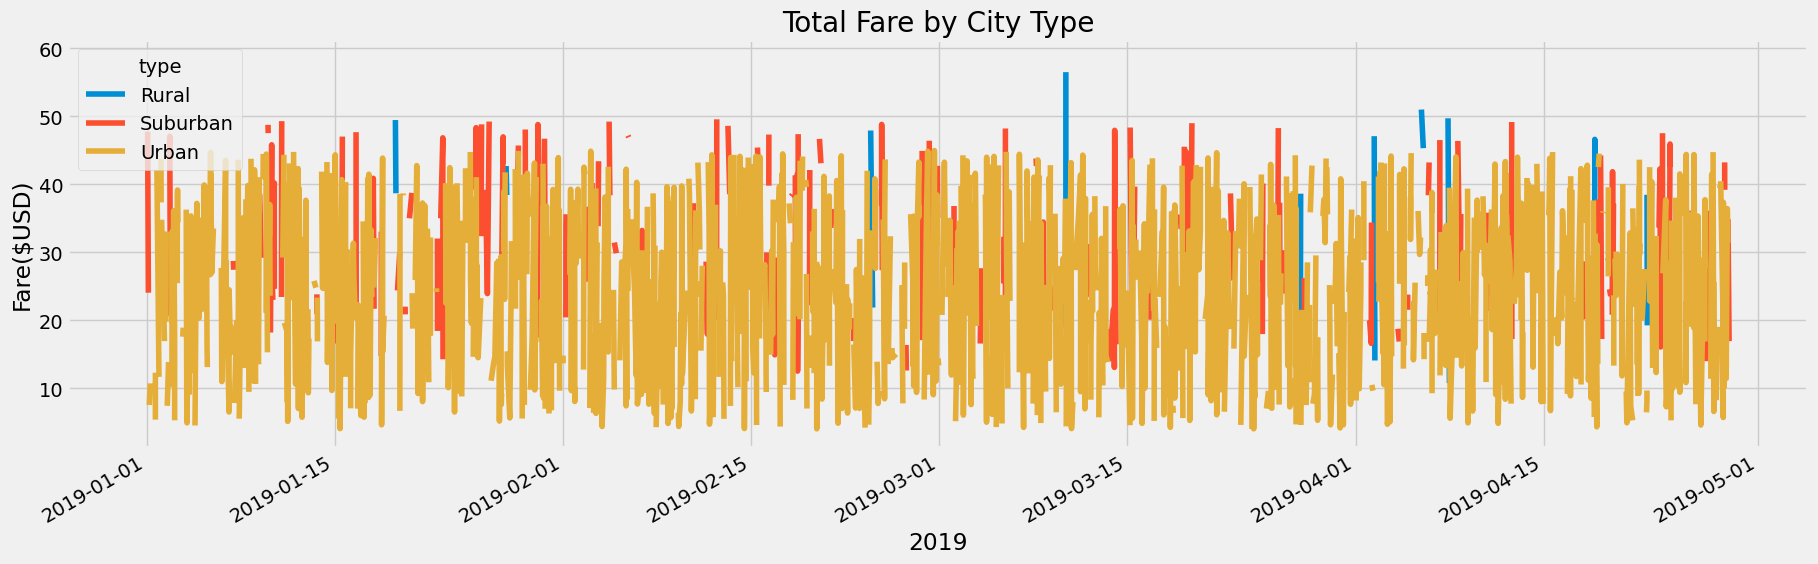

In [174]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
fares_Jan_April.plot(figsize=(20,6))
style.use('fivethirtyeight')

plt.title("Total Fare by City Type")
plt.xlabel("2019")
plt.ylabel("Fare($USD)")

#plt.xlim("Jan", "Apr")
#plt.ylim(0, 2500)

#fares_Jan_April.plot(kind="line")
#plt.plot(fares_Jan_April, types, marker="o", color="blue", linewidth=1)
plt.show()